 Solve the ODE below by newton-linearization scheme
 
 $y'' - (y')^2 - y^2 + y + 1 = 0 $ 
 
 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
def get_a(x, h):
	return 1/(h**2) - 1/(4.0 * h**2)
def get_b(x, h):
	return - 2/(h**2) + B(x)
def get_c(x, h):
	return 1/(h**2) + A(x)/(2.0 * h)

In [31]:
epsilon = 0.00001
def ThomasAlgorithm(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0]/b[0]
    d_dash[0] = d[0]/b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y



In [99]:
x0 = 0
xn = np.pi
y0 = 0.5 
yn = -0.5
def func(x0, xn, h = 0.1):
    lst = np.arange(x0, xn, h)
    lst = np.append(lst, xn)
    return lst

def BVP(x0, xn, y0, yn, step, epsilon = 0.0001):
    '''Keeping the initialization y = 0.5cos(x) '''
    x = func(x0, xn, step)
    print(x)
    y = 0.5*(np.cos(func(x0, xn, step)))
#     y = np.zeros(x.shape[0])
# #     y[0] = 0.5
#     y[-1] = -0.5
    print(y.shape)
#     a = [1/step**2 - 2*(y[i+1] - y[i-1])/(4*step**2)for i in range(1, len(y)-1)]
#     b = [-2/step**2 + -2*y[i] + 1 for i in range(1, len(y)-1)]
#     c = [1/step**2 + 2*(y[i+1] - y[i-1]) for i in range(1, len(y) -1)]
#     d = [-(y[i]**2 - y[i] - 1 + (y[i+1] -y[i-1])**2/(4*step**2) - (y[i-1] - 2*y[i] + y[i+1])/(step**2)) for i in range(1, len(y)-1)]
    delta_y = np.ones(y.shape)
    while(np.amax(np.absolute(delta_y))>epsilon):
        a = [1/step**2 + 2*(y[i+1] - y[i-1])/(4*step**2)for i in range(1, len(y)-1)]
        b = [-2/step**2 - 2*y[i] + 1 for i in range(1, len(y)-1)]
        c = [1/step**2 - 2*(y[i+1] - y[i-1])/(4*step**2) for i in range(1, len(y) -1)]
        d = [y[i]**2 - y[i] - 1 + (y[i+1] -y[i-1])**2/(4*step**2) - (y[i-1] - 2*y[i] + y[i+1])/(step**2) for i in range(1, len(y)-1)]
        delta_y = ThomasAlgorithm(a, b, c, d, len(y)-1)
        delta_y = np.insert(delta_y, 0, 0)
        delta_y = np.append(delta_y, 0)
        y = y + delta_y
    print(y)
    return y

y_new = BVP(x0, xn, y0, yn, step=0.2, epsilon = 0.001)
print(y_new)


[0.         0.2        0.4        0.6        0.8        1.
 1.2        1.4        1.6        1.8        2.         2.2
 2.4        2.6        2.8        3.         3.14159265]
(17,)
[  0.          -1.97769364  -3.90678151  -5.70926742  -7.31102328
  -8.64500281  -9.65428216 -10.29472426 -10.53709057 -10.36847394
  -9.79298213  -8.8316532   -7.52162476  -5.91461128  -4.0747687
  -2.07604584   0.        ]
[0.         0.98550929 1.94626708 2.84428489 3.64233336 4.30709233
 4.81015551 5.12951713 5.25058545 5.16690595 4.88050279 4.40183814
 3.74937548 2.94900371 2.03215719 1.03730161 0.        ]
[0.         0.48457368 0.9580719  1.40047805 1.79401495 2.12204331
 2.37057736 2.52870985 2.58919675 2.54880254 2.40847284 2.17331608
 1.85243671 1.45829007 1.00736596 0.51498825 0.        ]
[0.         0.2759549  0.51240895 0.72195077 0.90284425 1.04976984
 1.15713104 1.22043637 1.23681564 1.2052787  1.12682172 1.00443381
 0.84302631 0.6494889  0.43240949 0.20531465 0.        ]
[0.         0.046028

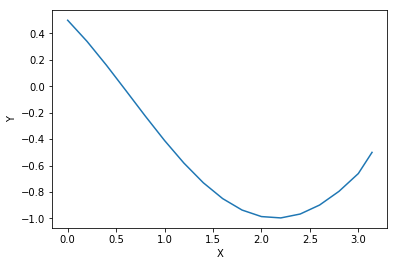

In [100]:
x = func(x0, xn, 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y_new, '-')